# Creating Surfaces of Revolution

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display


In [153]:
# Text widget for a function
expression = widgets.Text(
    placeholder='Example: X**2-1',
    description='Enter a function of X:',
    style= {'description_width': 'initial'}
)

In [172]:
# Enter a function of X
display(expression)

Text(value='exp(-X)-1', description='Enter a function of X:', placeholder='Example: X**2-1', style=Description…

In [173]:
print(expression.value)

exp(-X)-1


In [174]:
from sympy.parsing.sympy_parser import parse_expr
f = parse_expr(expression.value)
f

-1 + exp(-X)

In [212]:
# Capture desired range
start = widgets.FloatText(description='Start of Range:', style= {'description_width': 'initial'},value=-1)
end = widgets.FloatText(description='End of Range:', style= {'description_width': 'initial'}, value=1)
step = widgets.FloatText(description='Step:', style= {'description_width': 'initial'},value=0.1)
display(start,end,step)

FloatText(value=-1.0, description='Start of Range:', style=DescriptionStyle(description_width='initial'))

FloatText(value=1.0, description='End of Range:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.1, description='Step:', style=DescriptionStyle(description_width='initial'))

In [213]:
print(f'${start.value} to ${end.value}, step = ${step.value}')

$0.0 to $5.0, step = $0.1


In [214]:
from sympy import symbols, lambdify

X = symbols('X')
F = lambdify(X, f, 'numpy')

In [215]:
x = np.arange(start.value, end.value, step.value)
fx = np.vectorize(F)(x)

In [216]:
fig = px.line(x = x, y=fx, title=expression.value)
fig.show()

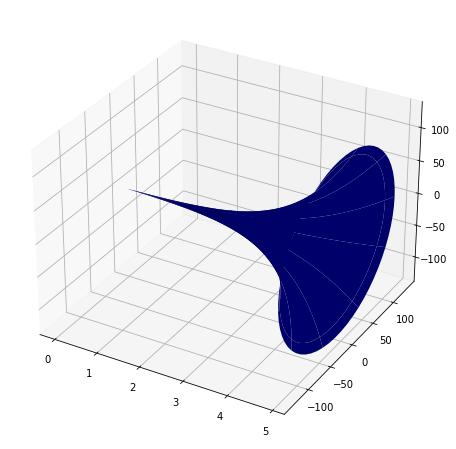

In [217]:
v = np.linspace(0, 2*np.pi, 60)
X, V = np.meshgrid(x, v)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
graph = F(-X)
Y = graph*np.cos(V)
Z = graph*np.sin(V)
ax.plot_surface(X, Y, Z, alpha=1, color='blue', rstride=6, cstride=12)
plt.show()

In [218]:
fig = go.Figure(data=[go.Surface(z=Z,x=X,y=Y)])
fig.show()